<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner



<hr style='height:2px'>

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Great job!</span></div></div>

In [92]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `publist.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [93]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import re
import json

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [94]:
# use this file 
PUB_FILENAME = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [40 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing an .html file is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS), which makes parsing HTML a lot easier.

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [25 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index for the rows.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  The `find_all` method of BeautifulSoup might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [95]:
# import the necessary libraries 
from bs4 import BeautifulSoup

 **1.1 [5 pts]  Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.**
    

In [96]:
# function specifies that input is a string and output is a BeautifulSoup object
def make_soup(filename: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    response = open(filename, "r")
    bs_object = BeautifulSoup(response, "html.parser")
    response.close()
    return bs_object

In [97]:
bs_object = make_soup(PUB_FILENAME)
# check your code - print the BS object, you should get a familiar HTML page as text
make_soup(PUB_FILENAME)

# we confirm that the output is the same as expected

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2 [25 pts] Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):**
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [98]:
def retrieve_author(soup: BeautifulSoup):
    '''Receive BeautifulSoup object and retrieve the name of the authors. 
       
       Args:
           soup: A BS object that holds the information for a single citation.
       
       Returns:
           A string of authors.
    '''
    return re.findall('<br/>(.*),', str(soup.find('li')))[0]

def retrieve_title(soup: BeautifulSoup):
    '''Receive BS object and retrieve the title of the citation. 
       
       Args:
           soup: A BS object that holds the information for a single citation.
       
       Returns:
           The title of the article as a string.
    '''
    return re.sub('\n', ' ', soup.find('a').text.strip().split('"')[1])

def retrieve_URL(soup: BeautifulSoup):
    '''Receive BS object and retrieve the URL for the citation. 
       
       Args:
           soup: A BS object that holds the information for a single citation.
       
       Returns:
           A URL for the article as a string.
    '''
    return soup.find('a').attrs['href']

def retrieve_journal(soup: BeautifulSoup):
    '''Receive BS object and retrieve the journal for the citation. 
       
       Args:
           soup: A BS object that holds the information for a single citation.
       
       Returns:
           A string that represents the journal name.
    '''
    return soup.find_all('i')[-1].text.strip()
    # Although one entry is an electronic journal, we are treating this as a normal journal name

def retrieve_volume(soup: BeautifulSoup, start_idx, position):
    '''Receive BS object and retrieve the volume of the journal for the citation. 
       
       Args:
           soup: A BS object that holds the information for a single citation.
       
       Returns:
           A string that represents the volume number.
    '''
    try: # sometimes the journal name is not given, so we return 'None listed' when the listing does not include it
        return soup.find('b').get_text() 
    except AttributeError:
        return 'None listed'
    # we used a try-except framework here in order to provide 'None listed' when volume was missing
    
def dict_bs(bs_object_input): 
    '''Read and parse BS object, then convert it into a list of dictionaries. 
       
       Args:
           BS object.
       
       Returns:
           List of dictionaries with each dictionary corresponding to one paper and each tags as keys.
    '''
    dict_bank = []
    dict_round_start = int(bs_object_input.find('ol')['start']) # indicates the index of the first listed citation, 273
    dict_round_end = int(bs_object_input.find_all('ol')[-1].get('start')) # indicates the index of the last listed citation, 200
    for idx in range(dict_round_start - dict_round_end + 1): # add 1 to get all the listed citations
        paper = {}
        larger_soup = bs_object_input.find('ol', attrs={'start':(dict_round_start - idx)}) # finds a single citation in the BS object based off of the original listing
        paper['author'] = retrieve_author(larger_soup)
        paper['title'] = retrieve_title(larger_soup)
        paper['URL'] = retrieve_URL(larger_soup)
        paper['journal'] = retrieve_journal(larger_soup)
        paper['volume'] = retrieve_volume(larger_soup, dict_round_start, idx)
        dict_bank.append(paper) # appends the dictionary created for an individual paper to the list of dictionaries 
    return dict_bank 
# note that try-except frameworks are not needed for all retrieval functions as no data were missing for the variables without try-except frameworks (we generated lists for each element of the dictonaries and the length was correct when data were all present)

In [103]:
# implementation
articles = dict_bs(make_soup(PUB_FILENAME))
print(articles[32])
# we have a similar structure
articles[0:3]

{'author': ' F.J. Rybicki, S. Melchionna, D. Mitsouras, A.U. Coskun, A.G. Whitmore, E. Kaxiras, S. Succi, P.H. Stone and C.L. Feldman', 'title': 'Prediction of coronary artery plaque progression and potential rupture from 320-detector row prospectively ECG-gated single heart beat CT angiography:  Lattice Boltzmann evaluation of endothelial shear stress', 'URL': 'Papers/IntJCardImag_25_289-299_2009.pdf', 'journal': 'Int. J. Cardiovasc. Imaging', 'volume': '25'}


[{'author': 'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng',
  'title': 'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons',
  'URL': 'Papers/2011/PhysRevB_84_125411_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng',
  'title': 'Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles',
  'URL': 'Papers/2011/PhysRevB_84_035325_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras',
  'title': 'Influence of CH2 content and network defects on the elastic properties of organosilicate glasses',
  'URL': 'Papers/2011/PhysRevB_83_054204_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '83'}]

**1.3 [5 pts] Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.**



In [104]:
f = open('publist.bib', 'w') # opening in writing mode

bibtex_template = """
    @article {{
         author = "{author}",
         title = "{title}",
         URL = "{URL}",
         journal = "{journal}",
         volume = "{volume}"
    }} """

for single in articles:
    f.write(bibtex_template.format(**single)) # formats data from list of dictionaries created into a bibtex file
f.close() # good practice to close files after opening and writing to them

**1.4 [5 pts] Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.** 

In [105]:
# create a pandas dataframe from the list of dictionaries created above and write that dataframe as a csv
pd.DataFrame.from_records(articles).to_csv('publist.csv', index = False, header = True)
# show the first few rows of a pandas dataframe from the list of dictionaries created above
pd.DataFrame.from_records(articles).head()

,URL,author,journal,title,volume
0,Papers/2011/PhysRevB_84_125411_2011.pdf,"Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nic...",PHYSICAL REVIEW B,Approaching the intrinsic band gap in suspende...,84
1,Papers/2011/PhysRevB_84_035325_2011.pdf,"JAdam Gali, Efthimios Kaxiras, Gergely T. Zima...",PHYSICAL REVIEW B,Effect of symmetry breaking on the optical abs...,84
2,Papers/2011/PhysRevB_83_054204_2011.pdf,"Jan M. Knaup, Han Li, Joost J. Vlassak, and Ef...",PHYSICAL REVIEW B,Influence of CH2 content and network defects o...,83
3,Papers/2011/PhysRevB_83_045303_2011.pdf,"Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsian...",PHYSICAL REVIEW B,Direct correlation of crystal structure and op...,83
4,Papers/2011/PhilTransRSocA_369_2354_2011.pdf,"Simone Melchionna, Efthimios Kaxiras, Massimo ...",Phil. Trans. R. Soc. A,Endothelial shear stress from large-scale bloo...,369


<hr style='height:2px'>

## Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first movie at age 17? 
+ how many performers started as child actors? 
+ who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [60 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [15 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [10 pts]** We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [6 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?

- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 

**2.8 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define **most prolific** as the performer with the most credits.
    
**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [107]:
import requests

**2.1 [5 pts] Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):**

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [108]:
url = 'https://www.imdb.com/list/ls025814950/'
my_page = requests.get(url)

In [109]:
# shows text for my_page
my_page.text

'\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2017 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (t

In [110]:
# shows status code for my_page
my_page.status_code

200

In [111]:
# shows content for my_page
my_page.content

b'\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2017 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (

**Description of attributes**


`my_page.text` outputs the HTML code of the given page as text of type string. For example, the .text attribute would provide "Some text" in the case of "`<p>Some text</p>`".

`my_page.status_code` provides the HTTP response code of the web server to the request for page content (in this case sent with requests.get). When the exchange between web server and the requesting device (e.g., my laptop) is completed successfully, the code will begin with a 2 (e.g., 200 = okay) but will begin with a 4 (e.g., 404 = file not found) if the request was erroneous on the client-side - such as my laptop requesting a page that does not exist - which is in contrast to a server-side error marked by a code beginning with 5 (such as a failed disk).

`my_page.content` provides the HTML source code from the web page in the data type of 'bytes' (apparent from the "b" character that is shown first in the my_page.content output) as opposed to a regular string provided with the `.text` attribute. Having the web page data in the form of bytes may be prefereable for filetypes with mixed content, such as text with numbers and images as well); in such cases it is possible that the `.text` attribute would not provide all possible information.

**2.2 [5 pts] Create a Beautiful Soup object named `star_soup` using `my_page` as input.**


In [112]:
star_soup = BeautifulSoup(my_page.text, "html.parser")

In [113]:
# check your code - you should see a familiar HTML code
print (star_soup.prettify()[:])

# we confirm that the output is the same as expected

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3 [15 pts] Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....**

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [115]:
def find_name(larger_soup: BeautifulSoup, idx):
    '''Receive BS object and index and retrieve the name of the star at that index. 
       
       Args:
           larger_soup: A BS object that holds the HTML source code of the page https://www.imdb.com/list/ls025814950/.
           idx: The place that the person in this list (Top 100 Stars of 2017) holds.
       
       Returns:
           The name of the person.
    '''
    return larger_soup[idx].find('a').text.strip()

def find_biosex(larger_soup: BeautifulSoup, idx):
    '''Receive BS object and index and retrieve the biological sex of the star at that index. 
       
       Args:
           larger_soup: A BS object that holds the HTML source code of the page https://www.imdb.com/list/ls025814950/.
           idx: The place that the person in this list (Top 100 Stars of 2017) holds.
       
       Returns:
           The biological sex of the person.
    '''
    link = larger_soup[idx].find('a').get('href') # retrieves link for that person's bio
    page_soup = BeautifulSoup(requests.get('https://www.imdb.com' + link).text) # converts the page into the HTML source code
    if page_soup.find('a', attrs={'name': 'actor'}):
        return 0
    elif page_soup.find('a', attrs={'name': 'actress'}):
        return 1
    else:
        print('BIOLOGICAL SEX NOT AVAILABLE')
        return 'Not available'
    # handle cases where 'actress' and 'actor' words are not provided (instead 'producer' or 'writer' may be used) by returning 'Not available'
    # this approach allows us to be consistent in the type of data we are collecting (inferring biological sex from images, names, or pronouns may actually be capturing a different type of information especially when scaled to larger datasets)
    # print error flag 'BIOLOGICAL SEX NOT AVAILABLE' in order to let us see which entries have this type of data missing

def grab_url(larger_soup: BeautifulSoup, idx):
    '''Receive BS object and index and retrieve the URL of the star's profile at that index. 
       
       Args:
           larger_soup: A BS object that holds the HTML source code of the page https://www.imdb.com/list/ls025814950/.
           idx: The place that the person in this list (Top 100 Stars of 2017) holds.
       
       Returns:
           The URL for the star's more in-depth profile.
    '''
    return 'https://www.imdb.com' + larger_soup[idx].find('a').get('href')

def grab_page(url):
    '''Receive URL for person's profile page and retrieve the HTML source code for that page. 
       
       Args:
           url: A string that is the URL for a specific star's profile page.
       
       Returns:
           The HTML source code for that URL.
    '''
    return BeautifulSoup(requests.get(url).text, "html.parser")

def parse_stars(star_soup: BeautifulSoup):
    '''Receive BS object from the IMDb page (https://www.imdb.com/list/ls025814950/, Top 100 Stars of 2017) and output key facts about a person. 
       
       Args:
           star_soup: A BS object that holds the HTML source code of the page https://www.imdb.com/list/ls025814950/.
       
       Returns:
           A list of dictionaries that hold the name, gender, profile page link, and profile page HTML source code for all Top 100 Stars of 2017.
    '''
    stars_bank = []
    larger_soup = star_soup.find_all('h3', attrs={'class': 'lister-item-header'})
    number_stars = 100 # interested in investigating the top 100 stars
    for idx in range(number_stars):
        stars = {}
        stars['name'] = find_name(larger_soup, idx)
        print(find_name(larger_soup, idx))
        stars['gender'] = find_biosex(larger_soup, idx)
        stars['url'] = grab_url(larger_soup, idx)
        stars['page'] = grab_page(stars['url'])
        time.sleep(10) # ensures that website is not requested too frequently, which could result in us being blocked
        stars_bank.append(stars)
        print(idx) # provides insight on progress with collecting all pages
    return stars_bank  

# note that try-except frameworks are not needed for all retrieval functions as no data were missing for the variables without try-except frameworks (we generated lists for each element of the dictonaries and the length was correct when data were all present)

This should give you 100

In [116]:
starlist = parse_stars(star_soup)

Gal Gadot
0
Tom Hardy
1
Emilia Clarke
2
Alexandra Daddario
3
Bill Skarsgård
4
Pom Klementieff
5
Ana de Armas
6
Dan Stevens
7
Sofia Boutella
8
Katherine Langford
9
Karen Gillan
10
Margot Robbie
11
Felicity Jones
12
Emma Stone
13
Dylan Minnette
14
Jennifer Lawrence
15
Alicia Vikander
16
Britt Robertson
17
Ruby Rose
18
Brie Larson
19
Keanu Reeves
20
Sophia Lillis
21
Jessica Henwick
22
Cara Delevingne
23
Haley Bennett
24
Luke Evans
25
Teresa Palmer
26
Tom Holland
27
Alison Brie
28
Robin Wright
29
Zendaya
30
Emma Watson
31
Scarlett Johansson
32
Dafne Keen
33
Kelly Rohrbach
34
Eiza González
35
Laura Haddock
36
Mary Elizabeth Winstead
37
Taron Egerton
38
Anya Taylor-Joy
39
Elizabeth Debicki
40
Katheryn Winnick
41
Sean Young
42
Bill Paxton
43
Charlie Hunnam
44
Yvonne Strahovski
45
Jason Momoa
46
Lily James
47
Jodie Whittaker
48
Ryan Gosling
49
Adrianne Palicki
50
Millie Bobby Brown
51
Allison Williams
52
Chris Pratt
53
Katherine Waterston
54
Tom Cruise
55
Johnny Depp
56
James McAvoy
57
Travis 

In [117]:
len(starlist)

100

In [118]:
# check your code
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]

# we confirm that the output is the same as expected

{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if (typeof

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

**2.4 [15 pts] Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [119]:
def birthyear(page_soup: BeautifulSoup): # takes in page HTML (index to a certain entry)
    '''Receive BS object for a specific star on the IMDb page (https://www.imdb.com/list/ls025814950/, Top 100 Stars of 2017) and output the person's birthyear. 
       
       Args:
           page_soup: A BS object that holds the HTML source code of the star's profile page.
       
       Returns:
           The birthyear of the star, as an int.
    '''
    years = 4 # number of integers used to represent year (allows us to take only the first year if a range of years are given)
    try:
        return int(page_soup.find('time').get('datetime')[:years]) # cast as int to facilitate subtraction of dates later on
    except AttributeError:
        print('NO BIRTH YEAR GIVEN')
        return 'Not available'
    # if no birthday year is given, we return 'Not available'
    # flag cases where birth year is missing with print statement
    
def firstfilmyear(page_soup: BeautifulSoup) -> int:
    '''Receive BS object for a specific star on the IMDb page (https://www.imdb.com/list/ls025814950/, Top 100 Stars of 2017) and output the person's birthyear. 
       
       Args:
           page_soup: A BS object that holds the HTML source code of the star's profile page.
       
       Returns:
           The year of the star's debut, as an int.
    '''
    always_last_year_in_list = -1
    years = re.sub("\D", "", page_soup.find('div', attrs={'class': 'filmo-category-section'}).find_all('span')[always_last_year_in_list].text)
    if len(years) > 4: # if the star's debut was in a series that spans years (XXXX-XXXX), we will take the first year as their debut
        multiple_years = years[0:4]
        print('FIRST FILM YEAR HAS MORE THAN 4 DIGITS')
        return int(multiple_years)
    return int(years) # cast as int to facilitate subtraction of dates later on
    # flag cases when debut film year is missing with print statement so we can check whether our handing of corner cases is acceptable

def firstfilm(page_soup: BeautifulSoup):
    '''Receive BS object for a specific star on the IMDb page (https://www.imdb.com/list/ls025814950/, Top 100 Stars of 2017) and output the person's debut film/series/short/etc. 
       
       Args:
           page_soup: A BS object that holds the HTML source code of the star's profile page.
       
       Returns:
           The name of the star's debut film/series/short/etc., as an int.
    '''
    always_last_film_in_list = -1 # IMDb lists the stars' roles in chronological order such that their debut piece is last in the list
    position = page_soup.find('div', attrs={'class': 'head'}).find('a').get('name')
    return page_soup.find('a', attrs={'name': position}).find_next().find_all('b')[always_last_film_in_list].text.strip()

def credits(page_soup: BeautifulSoup, biosex: int) -> int:
    '''Receive BS object for a specific star on the IMDb page (https://www.imdb.com/list/ls025814950/, Top 100 Stars of 2017) and the biological sex and output the person's film credits. 
       
       Args:
           page_soup: A BS object that holds the HTML source code of the star's profile page.
           biosex: An int that represents the biological sex of the person; 1 for female, 0 for male.
       
       Returns:
           The number credits the star has, as an int.
    '''
    always_sixth_element = 6 # this number is always the sixth element in the BS object used
    return int(re.sub("\D", "", page_soup.find('div', attrs = {'class' : 'head'}).contents[always_sixth_element].strip()))
    # deleting characters that are not digits

def create_star_table(starlist: list) -> list:
    '''Receive list of stars on the page https://www.imdb.com/list/ls025814950/ and output a table of this data. 
       
       Args:
           starlist: A list of dictionaries that holds key facts about each star listed on the IMDb page above.
       
       Returns:
           A table of these key facts and stars.
    '''
    star_profiles = []
    star_count = 0 # counter to retrieve values for each star from the list in an ordered way
    for star in starlist:
        star_summary = {}
        star_summary['name'] = starlist[star_count]['name']
        print(starlist[star_count]['name'])
        print(star_count)
        star_summary['gender'] = starlist[star_count]['gender']
        if star_summary['gender'] == 'Not available':
            print('BIOLOGICAL SEX NOT AVAILABLE')
        star_summary['year_born'] = birthyear(starlist[star_count]['page'])
        star_summary['year_first_movie'] = firstfilmyear(starlist[star_count]['page'])
        star_summary['first_movie'] = firstfilm(starlist[star_count]['page'])
        star_summary['credits'] = credits(starlist[star_count]['page'], star_summary['gender'])
        
        star_profiles.append(star_summary) # append dictionary to table
        star_count += 1 
    return star_profiles

In [120]:
star_table = create_star_table(starlist) # implement function

Gal Gadot
0
Tom Hardy
1
Emilia Clarke
2
Alexandra Daddario
3
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Bill Skarsgård
4
Pom Klementieff
5
Ana de Armas
6
Dan Stevens
7
Sofia Boutella
8
Katherine Langford
9
Karen Gillan
10
Margot Robbie
11
Felicity Jones
12
Emma Stone
13
Dylan Minnette
14
Jennifer Lawrence
15
Alicia Vikander
16
Britt Robertson
17
Ruby Rose
18
Brie Larson
19
Keanu Reeves
20
Sophia Lillis
21
Jessica Henwick
22
Cara Delevingne
23
Haley Bennett
24
Luke Evans
25
Teresa Palmer
26
Tom Holland
27
Alison Brie
28
Robin Wright
29
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Zendaya
30
Emma Watson
31
Scarlett Johansson
32
Dafne Keen
33
NO BIRTH YEAR GIVEN
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Kelly Rohrbach
34
Eiza González
35
Laura Haddock
36
Mary Elizabeth Winstead
37
Taron Egerton
38
Anya Taylor-Joy
39
Elizabeth Debicki
40
Katheryn Winnick
41
Sean Young
42
Bill Paxton
43
Charlie Hunnam
44
Yvonne Strahovski
45
Jason Momoa
46
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Lily James
47
Jodie Whitt

In [121]:
# check your code
star_table

# we confirm that the output is the same as expected

[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': 1985,
  'year_first_movie': 2007,
  'first_movie': 'Bubot',
  'credits': 28},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': 1977,
  'year_first_movie': 2001,
  'first_movie': 'Tommaso',
  'credits': 56},
 {'name': 'Emilia Clarke',
  'gender': 1,
  'year_born': 1986,
  'year_first_movie': 2009,
  'first_movie': 'Doctors',
  'credits': 19},
 {'name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': 1986,
  'year_first_movie': 2002,
  'first_movie': 'All My Children',
  'credits': 57},
 {'name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': 1990,
  'year_first_movie': 2000,
  'first_movie': 'Järngänget',
  'credits': 34},
 {'name': 'Pom Klementieff',
  'gender': 1,
  'year_born': 1986,
  'year_first_movie': 2007,
  'first_movie': 'Après lui',
  'credits': 33},
 {'name': 'Ana de Armas',
  'gender': 1,
  'year_born': 1988,
  'year_first_movie': 2006,
  'first_movie': 'Una rosa de Francia',
  'credits': 31},
 {'name': 'Dan Stev

Your output should look like this (the order of elements is not important):
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

**2.5 [4 pts] Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.**


In [139]:
# create pandas dataframe from list of dictionaries generated above
df_stars_profiles = pd.DataFrame(star_table)
# rearrange column names to match order of dictionaries
df_stars_profiles2 = df_stars_profiles[['name', 'gender', 'year_born', 'first_movie', 'year_first_movie', 'credits']]
# inspect dataframe
print(df_stars_profiles2)
# convert pandas dataframe to json file, orienting by records in order to account for the list of dictionaries
df_stars_profiles2.to_json('starinfo.json', orient='records')

                       name         gender      year_born                                   first_movie  year_first_movie  credits
0                 Gal Gadot              1           1985                                         Bubot              2007       28
1                 Tom Hardy              0           1977                                       Tommaso              2001       56
2             Emilia Clarke              1           1986                                       Doctors              2009       19
3        Alexandra Daddario              1           1986                               All My Children              2002       57
4            Bill Skarsgård              0           1990                                    Järngänget              2000       34
5           Pom Klementieff              1           1986                                     Après lui              2007       33
6              Ana de Armas              1           1988                          

To check your JSON saving, re-open the JSON file and reload the code

In [140]:
with open("starinfo.json", "r") as fd:
    star_table2 = json.load(fd)

    # output should be the same
star_table

# we confirm that the output is the same as expected

[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': 1985,
  'year_first_movie': 2007,
  'first_movie': 'Bubot',
  'credits': 28},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': 1977,
  'year_first_movie': 2001,
  'first_movie': 'Tommaso',
  'credits': 56},
 {'name': 'Emilia Clarke',
  'gender': 1,
  'year_born': 1986,
  'year_first_movie': 2009,
  'first_movie': 'Doctors',
  'credits': 19},
 {'name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': 1986,
  'year_first_movie': 2002,
  'first_movie': 'All My Children',
  'credits': 57},
 {'name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': 1990,
  'year_first_movie': 2000,
  'first_movie': 'Järngänget',
  'credits': 34},
 {'name': 'Pom Klementieff',
  'gender': 1,
  'year_born': 1986,
  'year_first_movie': 2007,
  'first_movie': 'Après lui',
  'credits': 33},
 {'name': 'Ana de Armas',
  'gender': 1,
  'year_born': 1988,
  'year_first_movie': 2006,
  'first_movie': 'Una rosa de Francia',
  'credits': 31},
 {'name': 'Dan Stev

**2.6 [10 pts] We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.**

In [141]:
# import json file into a pandas dataframe
frame = pd.read_json('data/staff_starinfo.json')

frame.dtypes # checking data types
# the data types are as expected. Note that previously, we had issues when performing the difference between birthyear and the year of their debut film/series, so we casted these values to be ints.

credits              int64
first_movie         object
gender               int64
name                object
year_born            int64
year_first_movie     int64
dtype: object

In [142]:
# create new column for person's age when their first movie or show came out
frame['age_at_first_movie'] = frame['year_first_movie'] - frame['year_born']

In [143]:
# inspect the pandas dataframe to start seeing if the variables need to be cleaned
# we do not notice obvious abnormalities upon inspection here
pd.set_option('display.max_rows', 150)
frame

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
0,28,Bubot,1,Gal Gadot,1985,2007,22
1,56,Tommaso,0,Tom Hardy,1977,2001,24
2,19,Doctors,1,Emilia Clarke,1986,2009,23
3,57,All My Children,1,Alexandra Daddario,1986,2002,16
4,34,Järngänget,0,Bill Skarsgård,1990,2000,10
5,33,Après lui,1,Pom Klementieff,1986,2007,21
6,31,Una rosa de Francia,1,Ana de Armas,1988,2006,18
7,42,Frankenstein,0,Dan Stevens,1982,2004,22
8,24,Le défi,1,Sofia Boutella,1982,2002,20
9,11,Story of Miss Oxygen,1,Katherine Langford,1996,2015,19


In [144]:
# check to see if there are any missing values
print(np.sum([frame.credits.isnull()]))
print(np.sum([frame.first_movie.isnull()]))
print(np.sum([frame.gender.isnull()]))
print(np.sum([frame.name.isnull()]))
print(np.sum([frame.year_born.isnull()]))
print(np.sum([frame.year_first_movie.isnull()]))
print(np.sum([frame.age_at_first_movie.isnull()]))
# no missing values in these columns

0
0
0
0
0
0
0


In [145]:
# check summary statistics of each variable to see if the variables need to be cleaned
frame.describe()
# summary data is as expected and no cleaning is needed at this point

,credits,gender,year_born,year_first_movie,age_at_first_movie
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,41.590000,0.720000,1983.060000,2000.950000,17.890000
std,23.405557,0.451261,12.788742,12.074161,6.975998
min,4.000000,0.000000,1904.000000,1925.000000,1.000000
25%,24.750000,0.000000,1979.000000,1998.000000,14.750000
50%,36.500000,1.000000,1985.500000,2003.000000,19.000000
75%,56.000000,1.000000,1990.000000,2008.250000,21.000000
max,124.000000,1.000000,2004.000000,2016.000000,48.000000


In [146]:
# check how edge cases were handled
# from our function create_star_table, we know that there were several instances of birth year not being given and several instances of first film's year not having just 4 digits
'''
Specifically, the printouts generated during create_star_table show the star's name followed by their index in the list followed by any error messages
Gal Gadot
0
Tom Hardy
1
Emilia Clarke
2
Alexandra Daddario
3
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Bill Skarsgård
4
Pom Klementieff
5
Ana de Armas
6
Dan Stevens
7
Sofia Boutella
8
Katherine Langford
9
Karen Gillan
10
Margot Robbie
11
Felicity Jones
12
Emma Stone
13
Dylan Minnette
14
Jennifer Lawrence
15
Alicia Vikander
16
Britt Robertson
17
Ruby Rose
18
Brie Larson
19
Keanu Reeves
20
Sophia Lillis
21
Jessica Henwick
22
Cara Delevingne
23
Haley Bennett
24
Luke Evans
25
Teresa Palmer
26
Tom Holland
27
Alison Brie
28
Robin Wright
29
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Zendaya
30
Emma Watson
31
Scarlett Johansson
32
Dafne Keen
33
NO BIRTH YEAR GIVEN
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Kelly Rohrbach
34
Eiza González
35
Laura Haddock
36
Mary Elizabeth Winstead
37
Taron Egerton
38
Anya Taylor-Joy
39
Elizabeth Debicki
40
Katheryn Winnick
41
Sean Young
42
Bill Paxton
43
Charlie Hunnam
44
Yvonne Strahovski
45
Jason Momoa
46
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Lily James
47
Jodie Whittaker
48
Ryan Gosling
49
Adrianne Palicki
50
Millie Bobby Brown
51
Allison Williams
52
Chris Pratt
53
Katherine Waterston
54
Tom Cruise
55
Johnny Depp
56
James McAvoy
57
Travis Fimmel
58
Charlize Theron
59
Cole Sprouse
60
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Kaya Scodelario
61
Abigail Breslin
62
Daisy Ridley
63
Emily Browning
64
Christopher Nolan
65
BIOLOGICAL SEX NOT AVAILABLE
Zoe Saldana
66
Lena Headey
67
Hugh Jackman
68
Kit Harington
69
Leonardo DiCaprio
70
Malina Weissman
71
Finn Jones
72
Chloë Grace Moretz
73
Alexander Skarsgård
74
Amy Adams
75
Bella Thorne
76
Rebecca Ferguson
77
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Julia Garner
78
Joan Crawford
79
Kate Mara
80
Chris Pine
81
Bryce Dallas Howard
82
Halston Sage
83
Kate Beckinsale
84
Connie Nielsen
85
Auli'i Cravalho
86
Mädchen Amick
87
Serinda Swan
88
Dave Bautista
89
Rose Leslie
90
Annabelle Wallis
91
Zoey Deutch
92
Sophie Turner
93
Dakota Johnson
94
Rosamund Pike
95
Elodie Yung
96
FIRST FILM YEAR HAS MORE THAN 4 DIGITS
Shailene Woodley
97
Nina Dobrev
98
Christian Navarro
99
NO BIRTH YEAR GIVEN

'''

# Index values 3, 29, 33, 46, 60, 65, 77, 96, and 99 had incomplete data after web scraping
# Check whether these cases were handled properly
frame.iloc[[3,29,33,46,60,65,77,96,99]]

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
3,57,All My Children,1,Alexandra Daddario,1986,2002,16
29,56,The Yellow Rose,1,Robin Wright,1966,1983,17
33,4,The Refugees,1,Dafne Keen,1966,2014,48
46,31,Baywatch,0,Jason Momoa,1979,1999,20
60,37,Grace Under Fire,0,Cole Sprouse,1992,1993,1
65,18,Tarantella,0,Christopher Nolan,1970,1989,19
77,30,Nya tider,1,Rebecca Ferguson,1983,1999,16
96,25,La vie devant nous,1,Elodie Yung,1981,2002,21
99,12,Law & Order: Criminal Intent,0,Christian Navarro,1966,2007,41


In [147]:
# checking some other random performers
frame.iloc[[0,50,99]]

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
0,28,Bubot,1,Gal Gadot,1985,2007,22
50,44,Rewrite,1,Adrianne Palicki,1983,2003,20
99,12,Law & Order: Criminal Intent,0,Christian Navarro,1966,2007,41


**Describing if we see any problems with the data**

We do not see any problems with the data formatting upon inspection. However, we notice that Dafne Keen has a rather old age (48) even though her birth year was not given in the HTML data. When we look up Dafne Keen's age on the internet (https://en.wikipedia.org/wiki/Dafne_Keen), we notice that her birth year is actually 2005 so her birth year was imputed incorrectly (given as 1966). We also notice that Christian Navarro's birth year (which was also missing in the original HTML data) was also imputed as 1966 even though he was actually born in 1991 (https://en.wikipedia.org/wiki/Christian_Navarro). Elodie Yung's earliest film/show was indeed in 2002 (even though HTML data gave a value with more than 4 digits as her debut year), so this corner case was handled correctly (https://en.wikipedia.org/wiki/%C3%89lodie_Yung#Film). The debut years of Rebecca Ferguson, Cole Sprouse, Jason Momoa, Dafne Keen, Robin Wright, and Alexandra Daddariodo were all handled correctly as verified by searching each person in wikipedia. The biological sex of Christopher Nolan was imputed correctly (he was not listed as an 'actor' or 'actress' so his sex was imputed). Moreover, we would also like to note that birthyear of the actor as calculated in this problem is not the best indicator of age because it is calculated just from subtracting years, so it is a rough approximation. To find the true age of the person at their first movie, we would also need to know the person's exact birthdate and month, in addition to knowing exactly when the film came out. This approximation technique may therefore affect the precision of the data.

**2.7 [6 pts] You are now ready to answer the following intriguing questions:**
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?
- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 


In [148]:
# group the dataframe created above by debut age and then use the method count to sum values per group for each column
frame2 = frame.groupby(['age_at_first_movie']).count()
# show the grouped dataframe
frame2

,credits,first_movie,gender,name,year_born,year_first_movie
age_at_first_movie,,,,,,
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,3,3,3,3,3,3
9,3,3,3,3,3,3
10,5,5,5,5,5,5


In [149]:
# confirm answer by finding number of performers debuting at age 17 using an alternative method (not recommended in instructions)
print('Number of people with debut age of 17:', len(frame[frame.age_at_first_movie == 17]))

Number of people with debut age of 17: 8


**2.7.1** Answer: 8 performers have their debut at age 17.

In [150]:
# define age threshold (in this case 12 years old)
cutoff = 12
# will use the following bins to inspect dataframe in new groups
# bins are from min debut age to age 12 and from age 12 to max debut age
ranges = [0, cutoff, max(frame['age_at_first_movie'])]
# group the dataframe according to specified bins and count values in each group
frame.groupby(pd.cut(frame.age_at_first_movie, ranges)).count()

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
age_at_first_movie,,,,,,,
"(0, 12]",20,20,20,20,20,20,20
"(12, 48]",80,80,80,80,80,80,80


In [151]:
# confirm answer by finding number of performers debuting at age <=12 using an alternative method (not recommended in instructions)
print('Number of people with debut age less than or equal to 12:', len(frame[frame['age_at_first_movie'] <= 12].name))

Number of people with debut age less than or equal to 12: 20


**2.7.2 Answer:** 20 people made their debut at age 12 or less


**2.8 [2 pts] Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define *most prolific* as the performer with the most credits.**

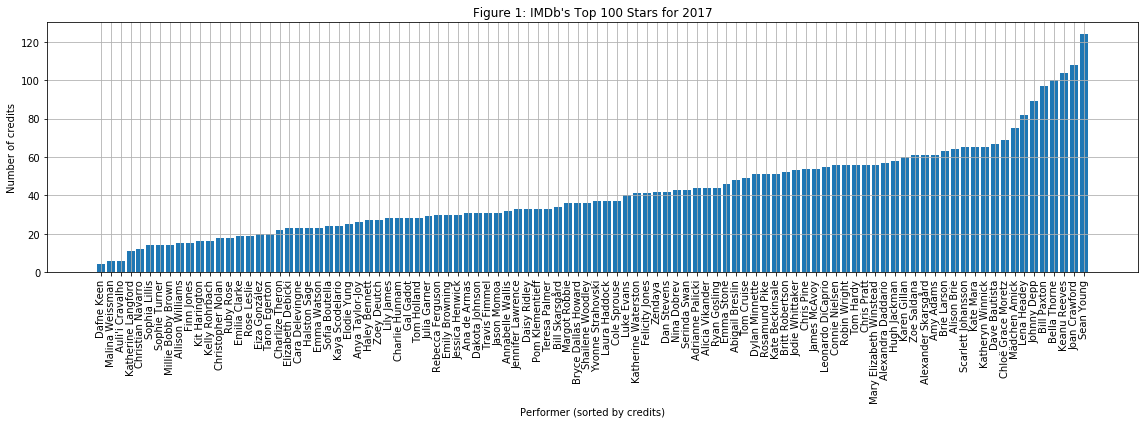

In [152]:
# create figure
plt.figure(figsize=[16,6])
newframe = frame.iloc[np.argsort(frame.credits)]
p1 = plt.bar(newframe.name, newframe.credits)
plt.title('Figure 1: IMDb\'s Top 100 Stars for 2017')
plt.xlabel('Performer (sorted by credits)')
plt.xticks(rotation='vertical')
plt.ylabel('Number of credits')

plt.grid('on')
plt.tight_layout()
plt.show();

**2.8 Answer:** Sean Young is the most prolific with over 120 credits. His exact number of credits is 124 as shown in next cell.

In [153]:
# confirm most prolific performer

frame.sort_values(by='credits', ascending=False).iloc[0]

credits                                    124
first_movie           Jane Austen in Manhattan
gender                                       1
name                                Sean Young
year_born                                 1959
year_first_movie                          1980
age_at_first_movie                          21
Name: 42, dtype: object

**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

Figure 1 shows that the performer with the most credits is Sean Young, and the number of credits per performer increases more rapidly for the top eight performers than for the first to 92nd performers, suggesting that there is a handful of performers who might stand out from the others in terms of the number of credits that they earned. When we look at a plot of credits for each performer when performers are sorted by their age at their first movie (Figure 2), we see that there does not seem to be a relation between the number of credits earned and the age at first movie since the heights of the bars in Figure 1 and Figure 2 do not follow the same pattern (x axis is performers sorted by the number of credits earned in Figure 1 and the x axis is performers sorted by the age at first movie in Figure 2; y axis for both plots is the number of credits). This suggests that the child stars do not necessarily earn more credits in their career compared to other stars. In addition, when we look at the performers grouped by gender (Figure 3) in relation to their number of credits, we see that there are three male performers who have more than 80 credits and there are four female performers with more than 80 credits even though there are more than twice as many females as males, suggesting that there may be a difference in the frequency of obtaining a high number of credits for males versus females and deserves further study (which is surprising to us because we did not know how gender might relate to number of credits earned).

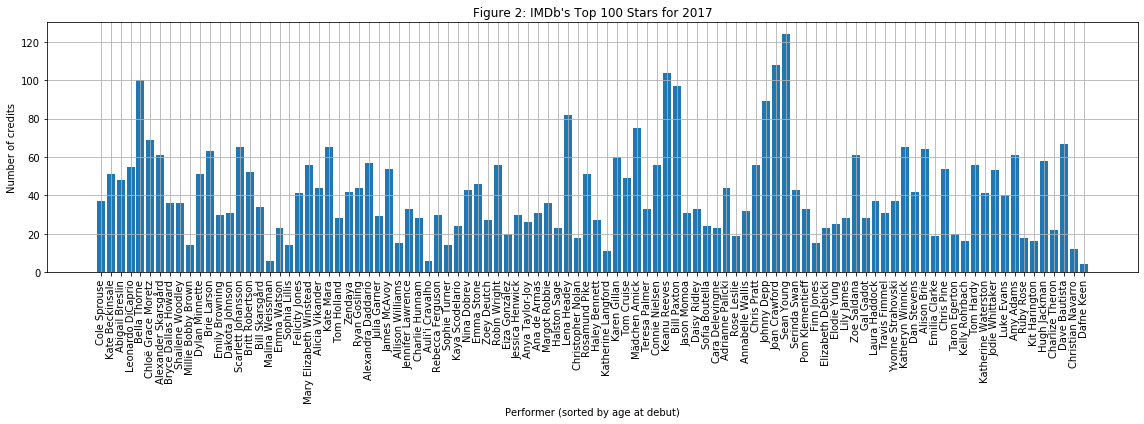

In [154]:
# create figure to show how age at first movie might influence number of credits
plt.figure(figsize=[16,6])
newframe = frame.iloc[np.argsort(frame.age_at_first_movie)]
p1 = plt.bar(newframe.name, newframe.credits)
plt.title('Figure 2: IMDb\'s Top 100 Stars for 2017')
plt.xlabel('Performer (sorted by age at debut)')
plt.xticks(rotation='vertical')
plt.ylabel('Number of credits')

plt.grid('on')
plt.tight_layout()
plt.show();

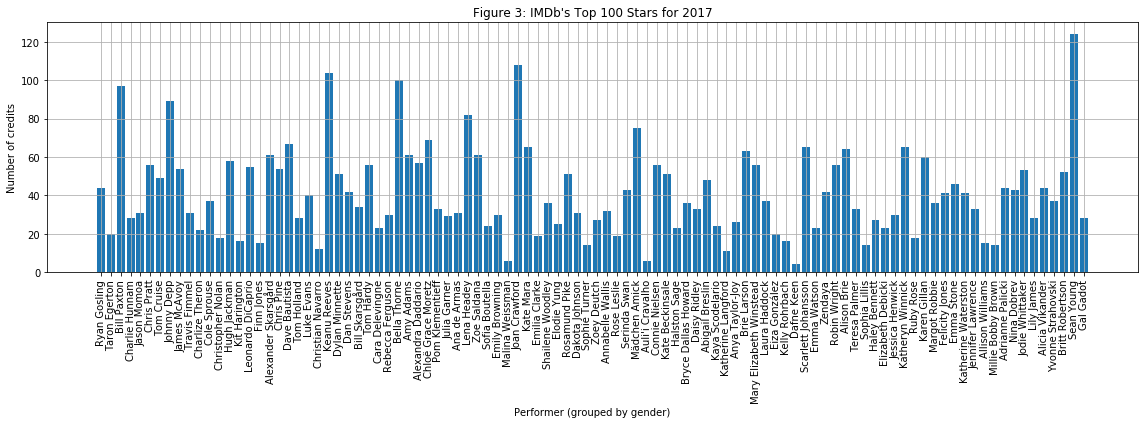

In [155]:
# create figure to investigate whether gender might influence number of credits
plt.figure(figsize=[16,6])
newframe = frame.iloc[np.argsort(frame.gender)]
p1 = plt.bar(newframe.name, newframe.credits)
plt.title('Figure 3: IMDb\'s Top 100 Stars for 2017')
plt.xlabel('Performer (grouped by gender)')
plt.xticks(rotation='vertical')
plt.ylabel('Number of credits')

plt.grid('on')
plt.tight_layout()
plt.show();

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Checked by: Brandon Walker
</footer>